# Demo - SAP2012ThermostatModel

This notebook shows a demonstration of the [`SAP2012ThermostatModel`](https://oblib.readthedocs.io/en/latest/SAP2012ThermostatModel_page.html) from the [OBLib](https://oblib.readthedocs.io/en/latest/index.html) Python package.

## Introduction

- SAP2012 is a domestic building energy calculation methodology used by the UK Government for building regulations compliance.
- In SAP2012 a simple thermostat model exists which states that the thermostat is set to 21$^\circ$C for two heating periods on weekdays and one longer heating period on the weekend.
- In OBLib, the [`SAP2012ThermostatModel`](https://oblib.readthedocs.io/en/latest/SAP2012ThermostatModel_page.html) implements this simple thermostat model. It is assumed that when the heating is switched off, this is equivalent to a thermosat setting of -100$^\circ$C.

## Quick demo

The code below generates the thermostat settings hour-by-hour for the first week of 2021.

<AxesSubplot:>

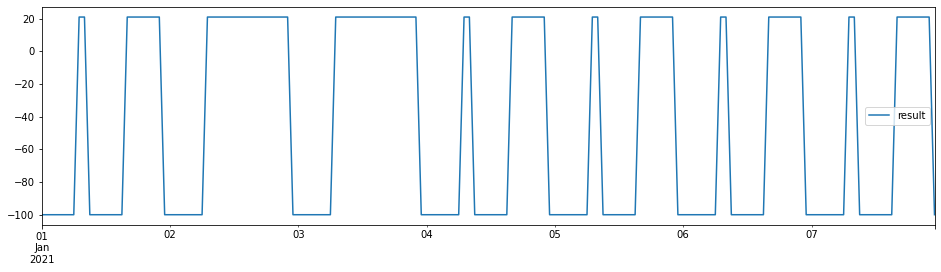

In [1]:
from OBLib import SAP2012ThermostatModel
m=SAP2012ThermostatModel()
m.inputs.set_timestamps(start=(2021,1,1),freq='H',periods=24*7)
result=m.run()
result.df.plot(figsize=(16,4))

## Detailed description

Here the above code is repeated, with explanations for each step provided.

### Line 1

First the model class is imported from the OBLib package.

In [2]:
from OBLib import SAP2012ThermostatModel
SAP2012ThermostatModel

OBLib.SAP2012ThermostatModel.SAP2012ThermostatModel

### Line 2

Next an instance of the model class is created.

In [3]:
m=SAP2012ThermostatModel()
m

### Line 3

The model instance has an attribute [`inputs`](https://oblib.readthedocs.io/en/latest/SAP2012ThermostatModel_page.html#OBLib.SAP2012ThermostatModel.SAP2012ThermostatModel.inputs) which contains a [`ScheduleInput`](https://oblib.readthedocs.io/en/latest/ScheduleModel_page.html#OBLib.ScheduleModel.ScheduleInputs) object. 

As the thermostat settings and timings are preset in this simple model, the only input required is the timestamps when the model should make its predicitons for.

This is done using the [`set_timestamps`](https://oblib.readthedocs.io/en/latest/ScheduleModel_page.html#OBLib.ScheduleModel.ScheduleInputs.set_timestamps) method on the input object.

In [4]:
m.inputs.set_timestamps(start=(2021,1,1),freq='H',periods=24*7)

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-01-07 14:00:00', '2021-01-07 15:00:00',
               '2021-01-07 16:00:00', '2021-01-07 17:00:00',
               '2021-01-07 18:00:00', '2021-01-07 19:00:00',
               '2021-01-07 20:00:00', '2021-01-07 21:00:00',
               '2021-01-07 22:00:00', '2021-01-07 23:00:00'],
              dtype='datetime64[ns]', length=168, freq='H')

### Line 4

The model is now run and the predictions generated.

The [`run`](https://oblib.readthedocs.io/en/latest/SAP2012ThermostatModel_page.html#OBLib.SAP2012ThermostatModel.SAP2012ThermostatModel.run) method returns an 'outputs object' - in this case a [`ScheduleOutputs`](https://oblib.readthedocs.io/en/latest/ScheduleModel_page.html#OBLib.ScheduleModel.ScheduleOutputs) instance.

In [5]:
result=m.run()
result

ScheduleOutputs(timestamps=DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-01-07 14:00:00', '2021-01-07 15:00:00',
               '2021-01-07 16:00:00', '2021-01-07 17:00:00',
               '2021-01-07 18:00:00', '2021-01-07 19:00:00',
               '2021-01-07 20:00:00', '2021-01-07 21:00:00',
               '2021-01-07 22:00:00', '2021-01-07 23:00:00'],
              dtype='datetime64[ns]', length=168, freq='H'), data={'result': [-100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, 21.0, 21.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0,

### Line 5

The [`df`](https://oblib.readthedocs.io/en/latest/ScheduleModel_page.html#OBLib.ScheduleModel.ScheduleOutputs.df) method returns a Pandas DataFrame of the results. 

The results can then be plotted using the Pandas [`plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method.

<AxesSubplot:>

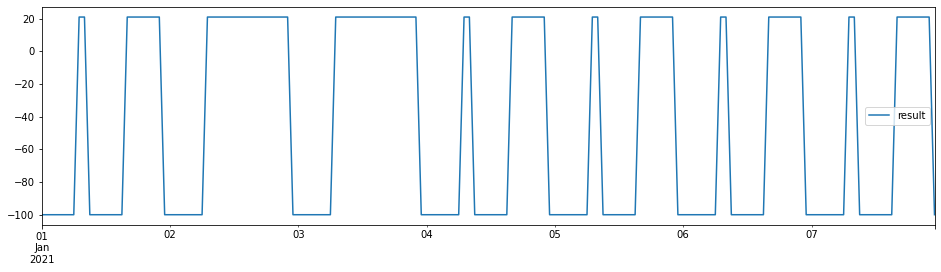

In [6]:
result.df.plot(figsize=(16,4))